# BOOM BIKES Rental 

## Step 1 : Reading and understanding DATA

In [1]:
# Suppress Warnings
import warnings 
warnings.simplefilter('ignore')

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Read data from file

df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Numerical columns - 
df.describe().columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### From above, it looks datatype are not in correct format, so lets convert it to proper format

### Treating Categorical columns and Visualizing the same

In [9]:
# 1. season columns
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
def assign_seasons(x):
    return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
    

In [11]:
df['season'] = df[['season']].apply(assign_seasons)

In [12]:
df.season.head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

In [13]:
# 2. Months

df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
def assign_month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                  7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
df['mnth'] = df[['mnth']].apply(assign_month)

In [16]:
df.mnth.value_counts()

Jul    62
Oct    62
May    62
Mar    62
Jan    62
Aug    62
Dec    62
Jun    60
Nov    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [17]:
# 3. Weekday
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [18]:
#Apply map function here as well

def assign_day(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',
                  4:'Thu',5:'Fri',6:'Sat'})

In [19]:
df['weekday'] = df[['weekday']].apply(assign_day)

In [20]:
df.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Sat    104
Sun    104
Fri    104
Name: weekday, dtype: int64

In [21]:
## 4. wheathersit

def assign_weather(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',
                  4:'Heavy Rain'})

In [22]:
df['weathersit'] = df[['weathersit']].apply(assign_weather)

In [23]:
df.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [25]:
df[['yr','holiday','workingday']]

# These 3 columns are categorirized in to 0 and 1 but datatype is still int, lets convert themto categorical format.

,yr,holiday,workingday
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
725,1,0,1
726,1,0,0
727,1,0,0
728,1,0,1


In [26]:
# 5. yr
df['yr']=df['yr'].astype('str')

In [27]:
#6. Holiday
df['holiday']=df['holiday'].astype('str')

In [28]:
# 7. Workingday
df['workingday']=df['workingday'].astype('str')

In [29]:
# Here dteday column format is also not correct, lets convert it to dateformat
df['dteday']=df['dteday'].astype('datetime64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [31]:
# Total Categorical columns

df_categorical=df.select_dtypes(exclude=['float64','int64','datetime64'])

In [32]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
len(df_categorical.columns) 

7

#### Visualizing categorical variable

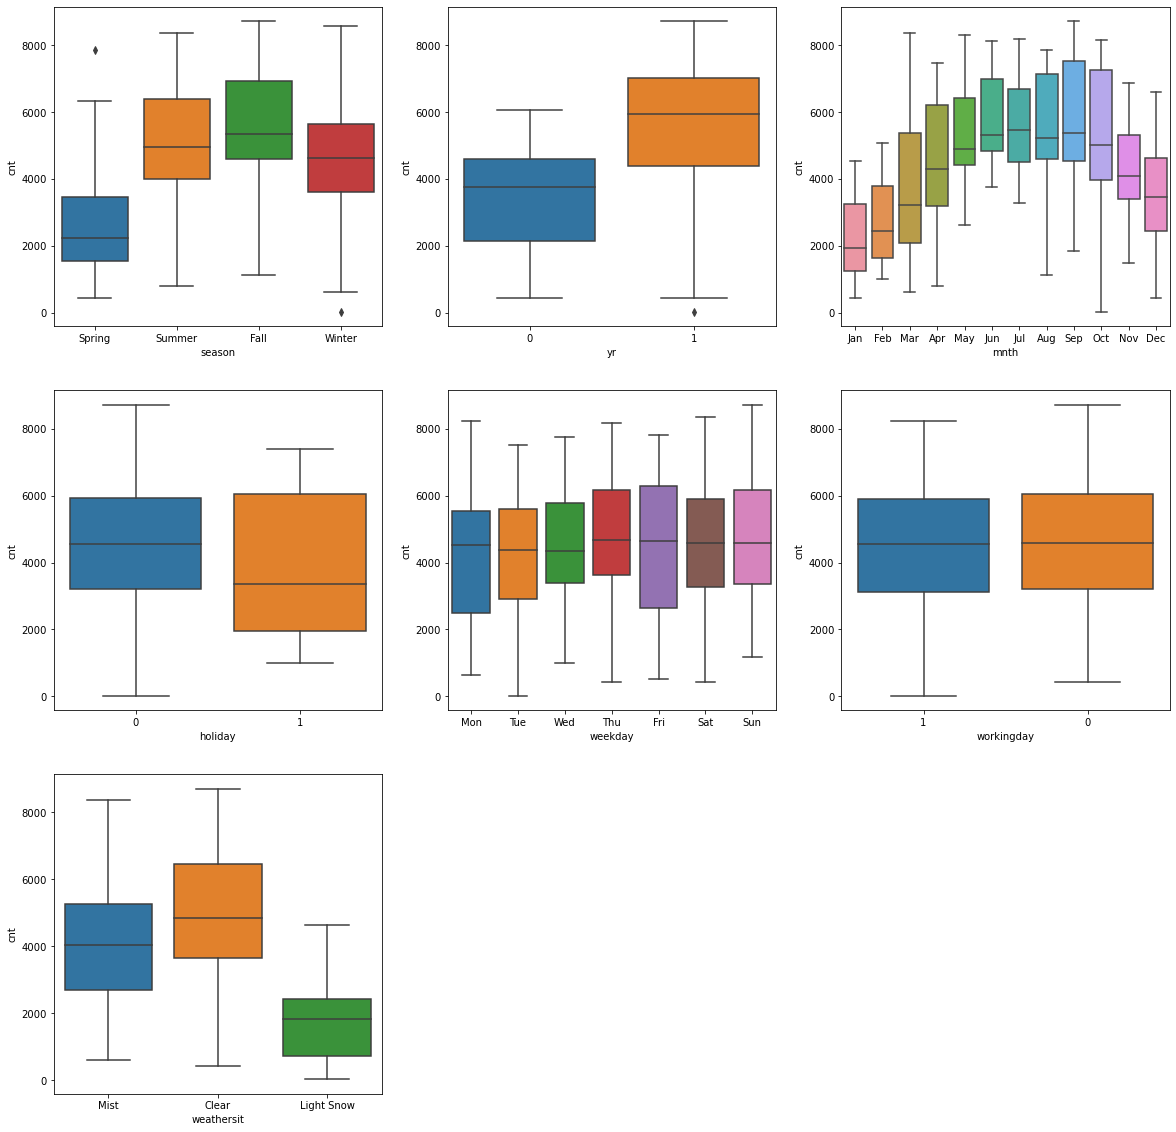

In [35]:

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

# Conclusion:
- Below can be the conclusion based on categorical variables, from Graph 1 onwards in sequnce
1. People more tend to Rent a bike in fall season followed by summer. In Spring season less people prefer to rent bike.
2. 2019 is the year where most of the people rented bike compared to year 2018. There is lot difference in median value in both the year.
3. Seasons and mnth variable are correlated as sales are more in month ranging Aug to Oct (fall season).
4. There is no significant difference in 75th percentile whether its holiday or not, on other hand More people likes to rent bike over the weekday this may due to they prefer going to offices by renting bike and can be cheaper.
5. In terms of day of weeks, the median value is approx. same for each day but there are fridays where more people sometimes rent bike sometimes very less people does the same.
6. The count of renting bikes at 25th, 75th percentile and median are almost identicle, this implies that people tend to ride a bike irrespective of day of week or holiday.
7. When weather is clear, people opt for ride and rent a bike more. In case of snow falls its very less.

### Treating Numerical Variables and Visualizing the same

In [36]:
#Converting casual,register,cnt to float

Numeric_list = ['casual','registered','cnt']

for var in Numeric_list:
    df[var] = df[var].astype('float')

In [37]:
df_numeric = df.select_dtypes(include=['float64'])

In [38]:
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

#### Visualizing the Distribution of few Numerical columns

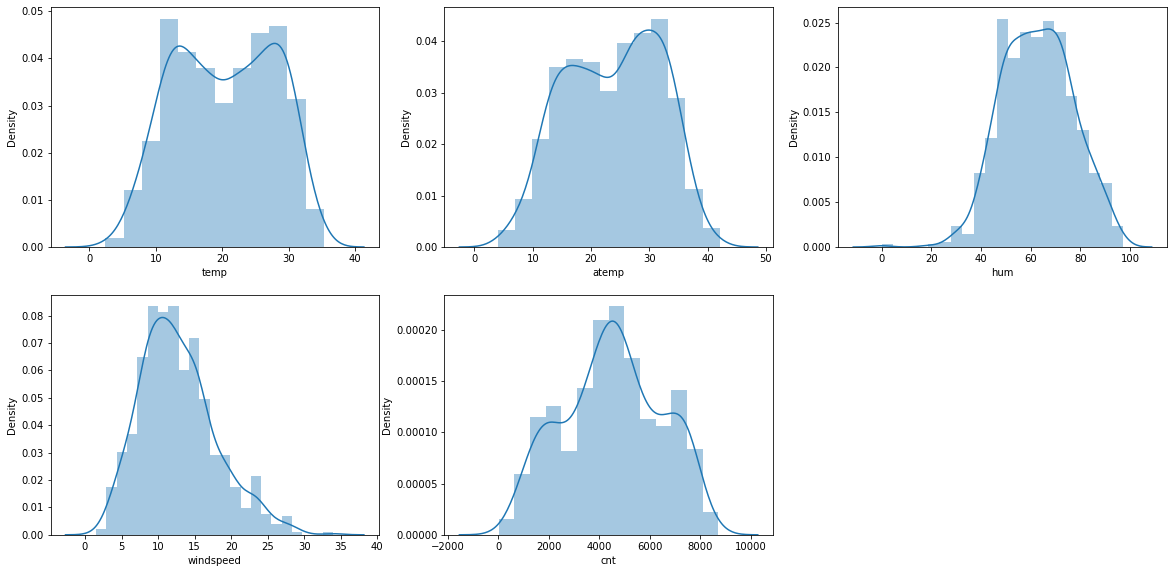

In [40]:
#Checking data for numerical varibles temp, atemp, hum, windspeed, cnt

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(df['temp'])
plt.subplot(3,3,2)
sns.distplot(df['atemp'])
plt.subplot(3,3,3)
sns.distplot(df['hum'])
plt.subplot(3,3,4)
sns.distplot(df['windspeed'])
plt.subplot(3,3,5)
sns.distplot(df['cnt'])
plt.show()

# Conclusion:
- Below can be the conclusion based on Numerical variables, from Graph 1 onwards in sequnce
1. Temperature variable is not normally distributed but we can figure out best temperature range is 10-30 celcius where people will tend to rent more bikes
2. Same case is with atemp but temp range varies from 15 to 35 celcius.
3. Humidity also plays important role as its not 100% normally distributed but to extend it is, 40-85 is quite good range for the same.
4. Windspeed is Normaly distributed, if wind flow is between 5 to (15-20), it will be easier for person to ride a bike and confortably, with more wind speed its difficult to ride a bike.
5. cnt variable is also not exactly normally distributed but we can see count of rented bikes varies between 2000 to 8000 per day.


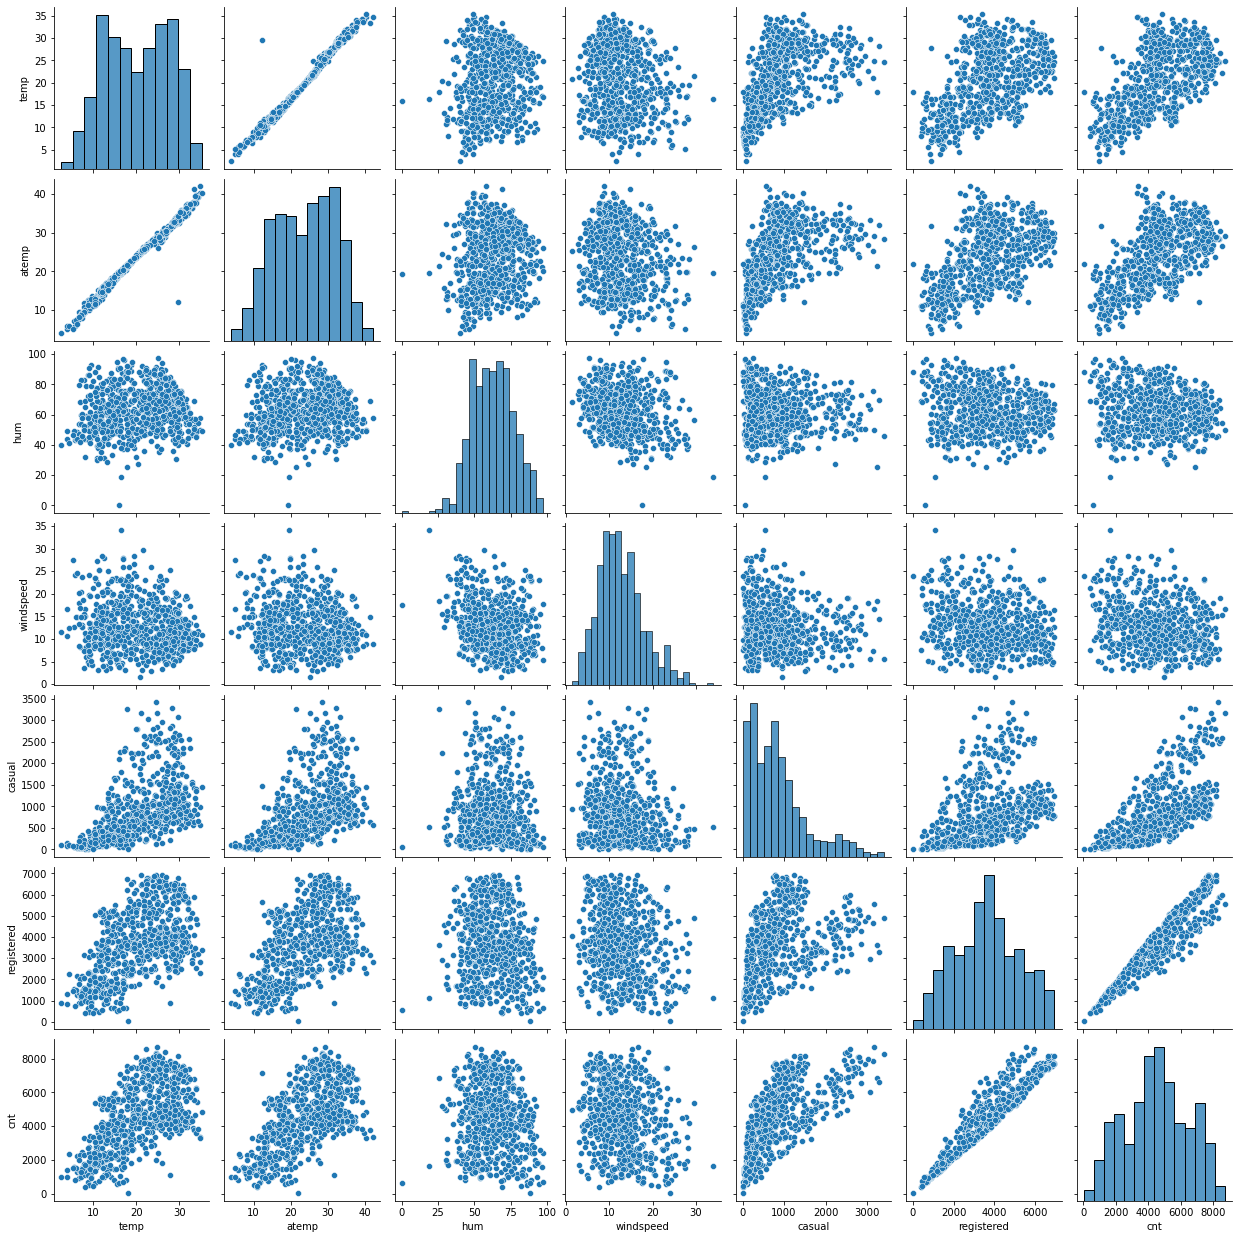

In [41]:
# Lets plot pairplot to check any linear correlation for numeric columns
sns.pairplot(df_numeric)
plt.show()

# Conclusion -
1. There is high correlation between temp and cnt, atemp and cnt
2. There is linear correlation between registered and cnt (but we should not take this variable as cnt = registered + casual)
3. similarly atemp and temp are linearly correlated but they signifies almost same thing so we can drop one of the variable

In [42]:
cor = df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


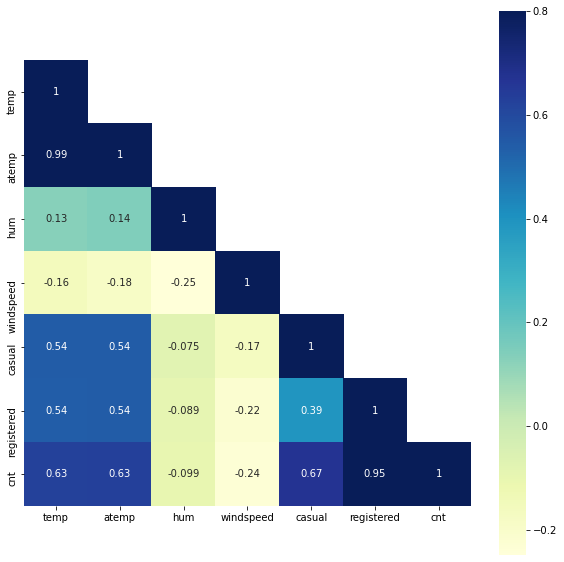

In [43]:
# Plot Heatmap for better view
mask = np.array(cor)
mask[ np.tril_indices_from (mask) ] = False
fig, ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True, cmap = 'YlGnBu')
plt.show()

# Conclusion:

1. There is High correlation between register user and cnt of rental bike. More the people register with boombike firm, more will be bike rental.
2. Also there is significant correlation with Temperature and cnt variable, Temperature is one of the factor affecting people renting bikes. 


### There are few columns that are not relevant or redundent like 'atemp', 'casual', 'registred', 'instant', 'dteday', lets drop them

In [44]:
df.drop('atemp',axis = 1, inplace=True)
df.drop('casual',axis = 1, inplace=True)
df.drop('registered',axis = 1, inplace=True)
df.drop('instant',axis = 1, inplace=True)
df.drop('dteday',axis = 1, inplace=True)

In [45]:
df.info()

## Now we have all the formatted data, lets move to step 2 Data Preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
dtypes: float64(4), object(7)
memory usage: 62.9+ KB


# Step 2 - Preparing Data for Modelling
- Encoding
    - Converting Binary variables to 1 and 0 if any
    - Other ctegorical variables to Dummy variables
- Spliting in to train and test
- Rescaling of variables

In [46]:
df_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Spring,0,Jan,0,Mon,1,Mist
1,Spring,0,Jan,0,Tue,1,Mist
2,Spring,0,Jan,0,Wed,1,Clear
3,Spring,0,Jan,0,Thu,1,Clear
4,Spring,0,Jan,0,Fri,1,Clear
...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Fri,1,Mist
726,Spring,1,Dec,0,Sat,0,Mist
727,Spring,1,Dec,0,Sun,0,Mist
728,Spring,1,Dec,0,Mon,1,Clear


In [47]:
df_categorical_new = df[['season','mnth','weekday','weathersit']]

In [48]:
df_categorical_new

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,Mist
1,Spring,Jan,Tue,Mist
2,Spring,Jan,Wed,Clear
3,Spring,Jan,Thu,Clear
4,Spring,Jan,Fri,Clear
...,...,...,...,...
725,Spring,Dec,Fri,Mist
726,Spring,Dec,Sat,Mist
727,Spring,Dec,Sun,Mist
728,Spring,Dec,Mon,Clear


In [49]:
Num_list = ['yr','holiday','workingday']

for var in Num_list:
    df[var] = df[var].astype('float64')
    df[var] = df[var].astype('int')

In [50]:
#Dummy variables - apply dummies to (season, mnth,weekday,weathersit)

df_dummies = pd.get_dummies(df_categorical_new, drop_first=True)


In [51]:
df_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Concatenate Dummies dataframe wuth original Dataframe
df = pd.concat([df,df_dummies],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [53]:
list(df_categorical_new.columns)

['season', 'mnth', 'weekday', 'weathersit']

In [54]:
# Drop redundent column like season, mnth, weekday, weathersit as we have already converted them to Dummies of 0s and 1s
df = df.drop(list(df_categorical_new.columns), axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data to Train and Test

In [55]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)



### Rescaling the feature

In [56]:
# 1.Initiate an Object 
scalar = MinMaxScaler()

#2. Creating list of Numeric variables
num_var = ['temp','hum','windspeed','cnt']

#3. Fit on data
df_train[num_var]=scalar.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [57]:
df_train[num_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


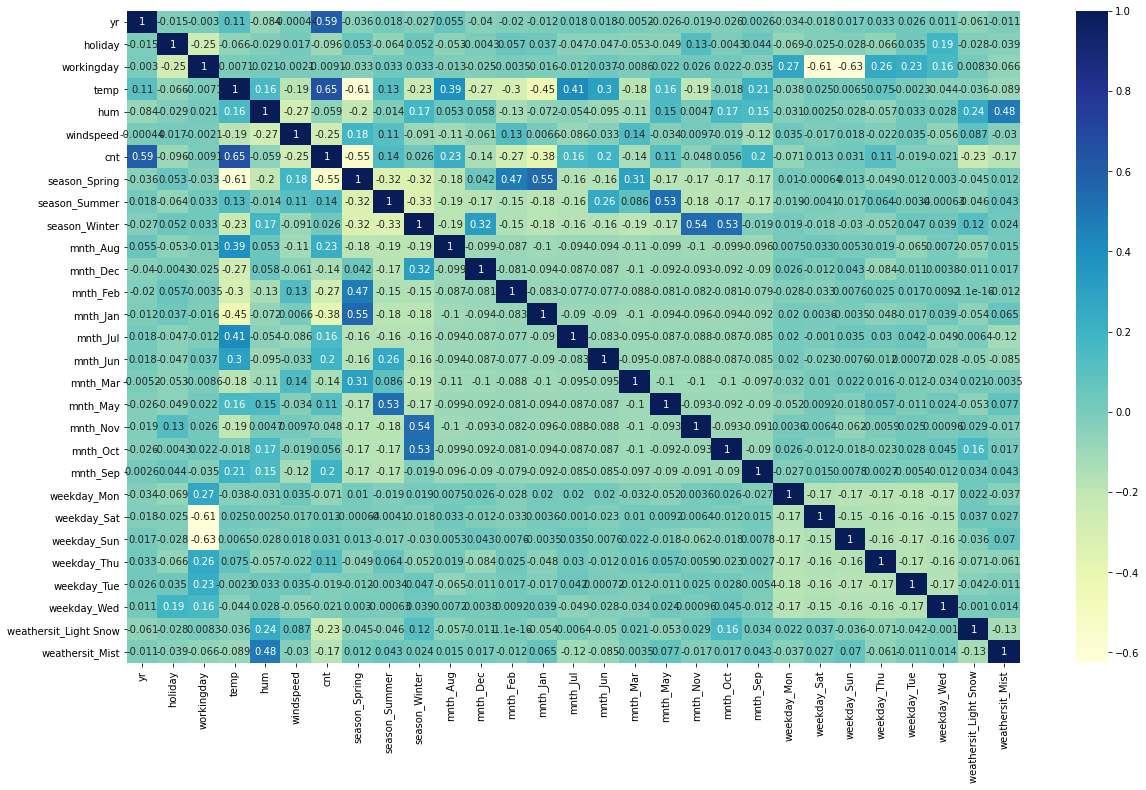

In [58]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Dividing in to X and y sets for model building

In [59]:
#X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

# Step 3 - Building Linear Model

###### To start with, we need to fit regression line through the training data using statsmodel. Here we need to add constant else line will fir via origin

In [60]:
# Running RFE with the output number of the variable equal to 12  ---- Tried with 15, 13 variables as well but got high R2 with 12
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

### Start with Model building

### Model 1 :- 

In [62]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [64]:
#Creating X_train dataframe with RFE selected values
X_train_rfe = X_train[col]

# Add constant
X_train_rfe = sm.add_constant(X_train_rfe) 

# fit a model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [65]:
lm.params

const                    0.284754
yr                       0.229357
holiday                 -0.096878
temp                     0.529863
hum                     -0.172595
windspeed               -0.182190
season_Spring           -0.056371
season_Summer            0.053078
season_Winter            0.097610
mnth_Jul                -0.057247
mnth_Sep                 0.083251
weathersit_Light Snow   -0.236920
weathersit_Mist         -0.052653
dtype: float64

In [66]:
# Print Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.95e-190
Time:                        21:46:53   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
6,season_Spring,5.02
3,temp,3.61
8,season_Winter,3.48
7,season_Summer,2.62
4,hum,1.89
12,weathersit_Mist,1.56
9,mnth_Jul,1.48
10,mnth_Sep,1.30
11,weathersit_Light Snow,1.24


In [68]:
#Season spring has VIF > 5 and low P value to dropping this column

In [69]:
# #X = X_train_rfe.drop('season_Spring',axis = 1)
X_train_new = X_train_rfe.drop(['const'],axis = 1)

### Model 2 :- 

In [70]:
# Add constant
X_train_lm = sm.add_constant(X_train_new) 

# fit a model
lm = sm.OLS(y_train, X_train_lm).fit()

#Print Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.95e-190
Time:                        21:46:53   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [71]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,season_Spring,4.01
7,season_Winter,3.33
6,season_Summer,2.79
11,weathersit_Mist,2.28
0,yr,2.08
8,mnth_Jul,1.58
9,mnth_Sep,1.38


In [72]:
# # Hum has VIF value > 5 and low P value, dropping this column
X = X.drop('hum',axis = 1)

### Model 3 (Final Model) :- 

In [73]:
# Add constant
X_train_lm = sm.add_constant(X) 

# fit a model
lm = sm.OLS(y_train, X_train_lm).fit()

#Print Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.06e-187
Time:                        21:46:53   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [74]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.23
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.78
7,mnth_Jul,1.58
10,weathersit_Mist,1.55
8,mnth_Sep,1.34
9,weathersit_Light Snow,1.08


# Step 4: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [75]:
y_train_pred = lm.predict(X_train_lm)

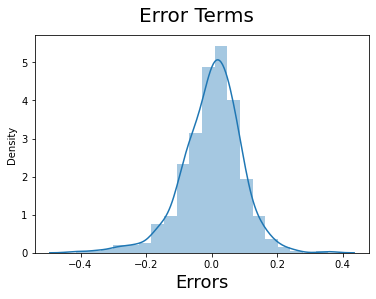

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

# Conclusion 
1. Error terms are Normally distributed


# Step 5 : Making Predictions using Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [77]:
#num_vars created while analysing data num_var = ['cnt','hum','windspeed','temp']

df_test[num_var] = scalar.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     220 non-null    int32  
 1   holiday                220 non-null    int32  
 2   workingday             220 non-null    int32  
 3   temp                   220 non-null    float64
 4   hum                    220 non-null    float64
 5   windspeed              220 non-null    float64
 6   season_Spring          220 non-null    uint8  
 7   season_Summer          220 non-null    uint8  
 8   season_Winter          220 non-null    uint8  
 9   mnth_Aug               220 non-null    uint8  
 10  mnth_Dec               220 non-null    uint8  
 11  mnth_Feb               220 non-null    uint8  
 12  mnth_Jan               220 non-null    uint8  
 13  mnth_Jul               220 non-null    uint8  
 14  mnth_Jun               220 non-null    uint8  
 15  mnth

In [80]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07240462561497799
Mean Squared Error: 0.009310968608097107
Root Mean Squared Error: 0.096493360435302


In [82]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('For training set, the r_squared value is :',r_squared,'\nFor training set, the adjsuted r_squared value is :',adjusted_r_squared)

For training set, the r_squared value is : 0.850189298267475 
For training set, the adjsuted r_squared value is : 0.841468508977432


In [83]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('For test set, the r_squared value is :',r_squared,'\nFor test set, the adjsuted r_squared value is :',adjusted_r_squared)

For test set, the r_squared value is : 0.8289018760341198 
For test set, the adjsuted r_squared value is : 0.8038194285417395


# Step 6 - Model Evaluation

In [84]:
r2_score(y_test, y_pred)

0.805268034904855

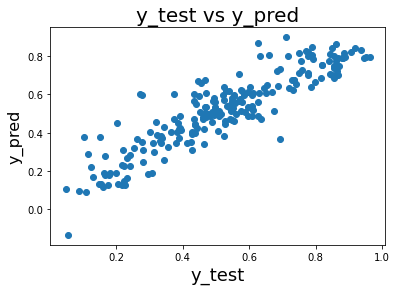

In [85]:
# Plot the graph of actual vs Predicted

plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [86]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.490988
1,yr,0.233570
0,const,0.199434
7,season_Winter,0.081741
9,mnth_Sep,0.076846
6,season_Summer,0.046487
8,mnth_Jul,-0.052057
5,season_Spring,-0.067169
11,weathersit_Mist,-0.080167


# Conclusion :-
We can see that the equation of our best fitted line is:

cnt = 0.199434 + 0.490988 X temp + 0.233570 X yr + 0.081741 X seasonWinter + 0.076846 X mnth_Sep + 0.046487 X season_Summer - 0.052057 X mnth_Jul - 0.067169 X season_Spring - 0.080167 X weathersit_Mist - 0.097463 X holiday - 0.147919 X windspeed - 0.284199 x weathersit_Light Snow

#### All the positive coefficients like temp, yr, season_Winter, mnth_Sep, season_Summer indicates that an increase in these values will lead to an increase in the value of cnt (i.e number rise in Rental of Bikes).
#### All the negative coefficients indicates that an increase in these values will lead to an decrease in the value of cnt.(i.e number lowers in Rental of Bikes)

1. Temp is the most significant variable with largest coefficient, followed by weathersit_Light Snow & Rain.
2. People use more Rental Bikes in month of Septeber, as weather is pleasent.
3. Bike rental during holidays, snowfall,mist weather, july month or in spring season are reduce in numbers. so Boom bikes should plan to have various offers to attract more customers for these variables.
4. Overall Conclusion is Bike rentals is majorly affected by temperature,season and month and to gain more customers, Boom Bike should launch various offers to grab more customers.